##IMPORTING THE LIBRARIES

Here, we have imported the ilbraries which are necessary, those being
numpy(used to work with arrays), pandas(used to work with data), 
scikitlearn(used to implement ML models) and seaborn to visualize data

In [506]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##IMPORTING THE DATASET

Here, we have used 'read_csv' to read the dataset into the notebook, then we have used 'head()' function to get a taste of the dataset which shows us the top 5 rows, then we used 'info()' function to actually check if there are any missing values, fortunately there are no missing values, so cleaning missing values need not be done

In [521]:
data = pd.read_csv('epoch.csv')
print(data.head())
print(data.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  k_value  l_value  m_value  percentage_free_sulphur  \
0      9.4 

##STATISTICAL INFO OF DATA

'describe()' provides us the statistical information of the dataset such as mean, standard deviation, minimum and maximum values and other important parameters for each feature of the data, we implemented 'describe()' this to check if there are any outliers and again fortunately, no outliers were detected

In [508]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

##FINDING CORRELATION BETWEEN FEATURES

'corr()' function provides us the correlation dataframe where the rows and columns are both the features, hence we get to know the correlation between the features, next to visualize it we have implemented the heatmap of the correlation data, this a very good method to improve our feature selction

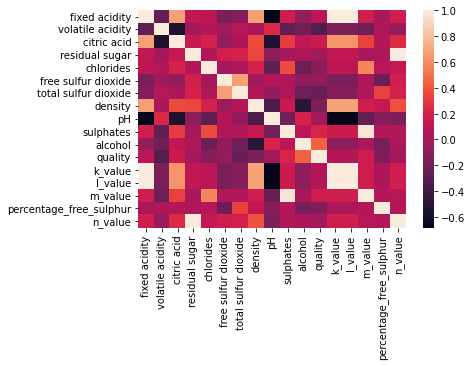

In [509]:
corr = data.corr()
sns.heatmap(corr)

So, as we see from the heatmap above, we are going to eliminate one of 2 features which lie in the correlation value region of white colour, which implies that both those features are strongly corelated and hence increase the redundancy in the model, the pairs which we found out are (fixed acidity, k value, l value); (residual sugar, n value); (sulphates, m value). Interestingly k value and l value have the same correlation with every feature, hence we directly opt out one of them i.e we are going to eliminate l value, now among the remaining pairs, to decide upon what to drop we are using the dataframe of correlation values which is exactly what print(corr) will do

In [510]:
print(corr)

                         fixed acidity  volatile acidity  citric acid  \
fixed acidity                 1.000000         -0.256131     0.671703   
volatile acidity             -0.256131          1.000000    -0.552496   
citric acid                   0.671703         -0.552496     1.000000   
residual sugar                0.114777          0.001918     0.143577   
chlorides                     0.093705          0.061298     0.203823   
free sulfur dioxide          -0.153794         -0.010504    -0.060978   
total sulfur dioxide         -0.113181          0.076470     0.035533   
density                       0.668047          0.022026     0.364947   
pH                           -0.682978          0.234937    -0.541904   
sulphates                     0.183006         -0.260987     0.312770   
alcohol                      -0.061668         -0.202288     0.109903   
quality                       0.095093         -0.321441     0.159129   
k_value                       0.994828         -0.1

Here, we have eliminated fixed acidity from (fixed acidity, k value) as clearky fixed acidity has a lot of correlation with other features, now we are eliminating both residual sugar and n value from their pair as both of them are strongly correlated with 0.993575 and have very minimum correlation with our target variable quality, from the pair of (sulphates, m value), we are eliminating m value, as it has higher correlation values with other features when compared with sulphates, interesting we found that quality has very minimum correlation with free sulphur dioxide and pH and also total sulphur dioxide accounts for free sulphur dioxide, and all the acid features account for pH, so we can remove these 2 features too

##VISUALIZING THE FEATURES

Here we have implemented a for loop where each iteration plots a histogram of a feature from our dataset, to implement this'distplot' is used from seaborn module and 'subplot()' does dimensioning of the space so that the histograms can be drawn as per our requirements, here too we can see the similarity between the histograms of the features which had high correlation values with each other, this just to confirm our feature elimination and to visualize each feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

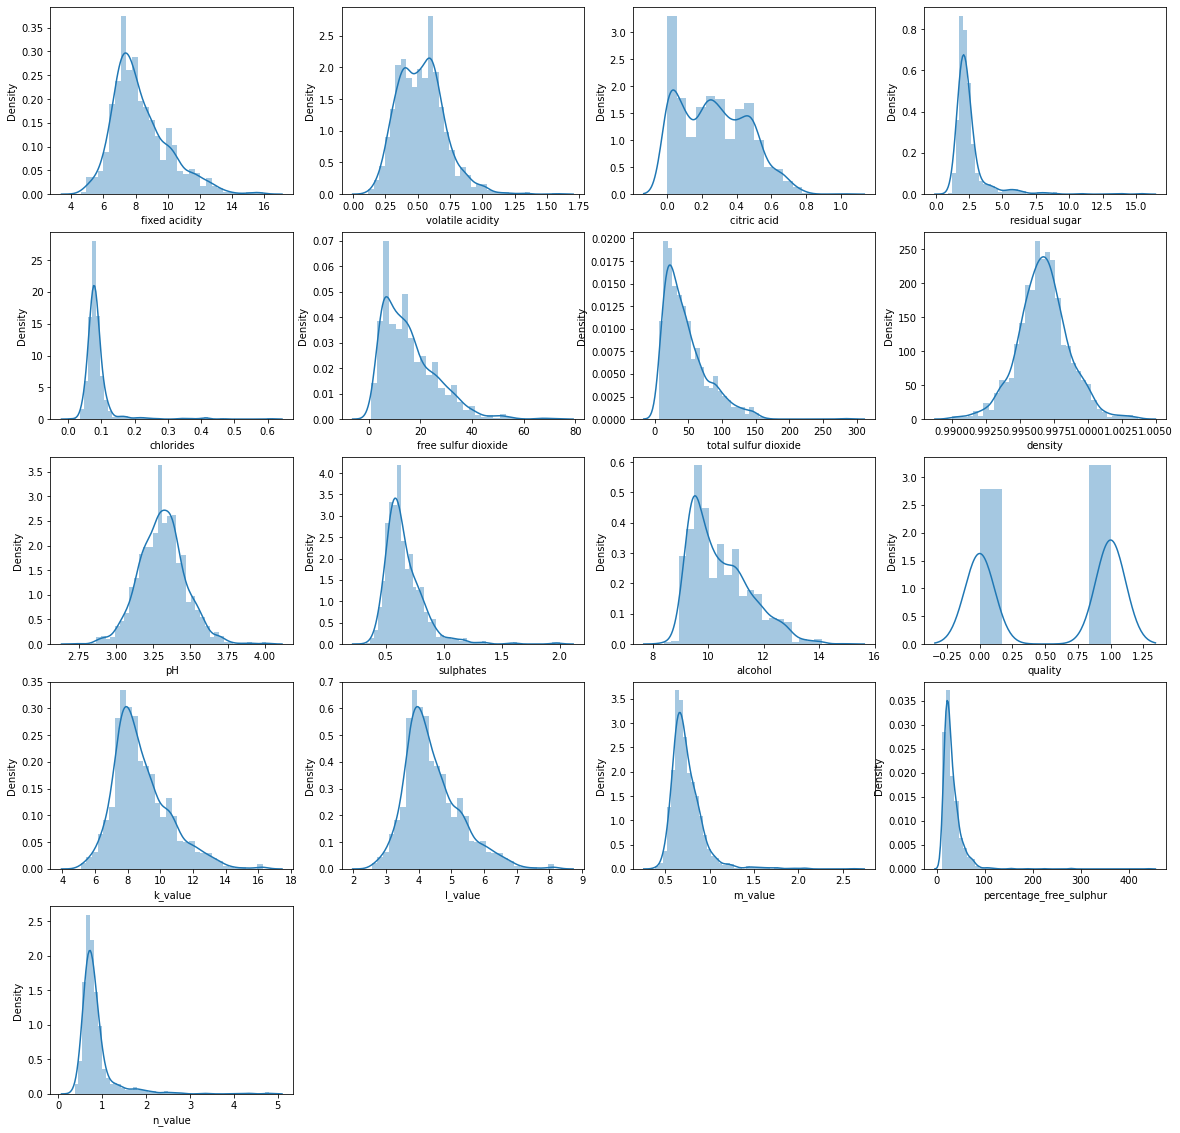

In [511]:

plt.figure(figsize = (20, 20))
num = 1

for columns in data:
    if num <= 17:
        plt.subplot(5, 4, num)
        sns.distplot(data[columns])
        plt.xlabel(columns)
        
    num += 1
    
plt.show()


## DROPPING OF UNWANTED FEATURES

Here, we have dropped our unwanted features using the 'drop()' function by selcting the indexes of the columns which we dropped and to see the remaining features we have used info() again

In [512]:
data = data.drop(data.columns[[0,3,5,8,13,14,16]], axis = 1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   volatile acidity         1599 non-null   float64
 1   citric acid              1599 non-null   float64
 2   chlorides                1599 non-null   float64
 3   total sulfur dioxide     1599 non-null   float64
 4   density                  1599 non-null   float64
 5   sulphates                1599 non-null   float64
 6   alcohol                  1599 non-null   float64
 7   quality                  1599 non-null   int64  
 8   k_value                  1599 non-null   float64
 9   percentage_free_sulphur  1599 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 125.0 KB
None


##OBTAINING FEATURE MATRIX AND PREDICTOR VECTOR

Here, we are splitting our data into feature matrix (the values of the features) and predictor vector(the values of the target variable i.e quality)

In [513]:
x = data.iloc[:, data.columns != "quality"].values
y = data.iloc[:, data.columns == "quality"].values
y = y.reshape(-1)

##SPLITTING THE DATASET INTO TRAINING AND TESTING DATA

Here we have maintained a ratio of 80:20 for our train:test split, we have directly made use of the train_test_split function which takes in feature matrix, predictor vector, test_size and provides us with training feature matrix, test feature matrix, training predictor vector and test predictor vector

In [514]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

##FEATURE SCALING

Here we are doing standard scaling (value-mean/std) to improve our model efficiency, we made use of the StandardScaler class from scikitlearn and fitted and transformed on training data, while we just transformed the test data from the fitted values obtained from training data

In [515]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


##TRAINING OUR MODEL

Here, we are training our Logistic Regression model on our training dataset, we have selected Logistic Regression becaues it is apparently the best model for huge datasets witj varied features

In [516]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0)

##RUNNING FEATURE IMPORTANCE

Here, we are running feature importannce from the permutation_importance class and fortunately we have found out that all the values are important, i.e by removing any feature, we may loose accuracy

In [517]:
from sklearn.inspection import permutation_importance
selector = permutation_importance(logreg, x_test, y_test)
print(selector.importances_mean)

[0.05125  0.015625 0.0075   0.006875 0.004375 0.016875 0.14875  0.02125
 0.      ]


##PREDICTING, CONFUSUION MATRIX AND ACCURACY

Here, we are predicting the target variable vector from the logistic regression of test data, then we are using confusion matrix to determine the 1T,1F,0T,0F values

In [518]:
y_pred = logreg.predict(x_test)

In [519]:
from sklearn.metrics import confusion_matrix, accuracy_score
cfmatrix = confusion_matrix(y_test, y_pred)
print(cfmatrix)

[[111  37]
 [ 41 131]]


Finally we are performing the accuracy test and by using the accuracy_score function, we have obtained a good accuracy of 75.625%

In [520]:
accuracy_score(y_test, y_pred)

0.75625